The scipy package contains various toolboxes dedicated to common issues in scientific computing.
Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc.

File input/output: scipy.io

Matlab files: Loading and saving:

In [4]:
from scipy import io as spio
import numpy as np
a = np.ones((3, 3))
spio.savemat('D:\\My Goals 2021\\1. DeepBytes\\1A. Python\\8. Module\\6.Scipy\\file.mat', {'a': a}) # savemat expects a dictionary

In [7]:
data = spio.loadmat('D:\My Goals 2021\1. DeepBytes\1A. Python\8. Module\6.Scipy\file.mat','r')
data['a']

OSError: [Errno 22] Invalid argument: 'D:\\My Goals 2021\x01. DeepBytes\x01A. Python\\8. Module\x06.Scipy\x0cile.mat'

 Reading images:

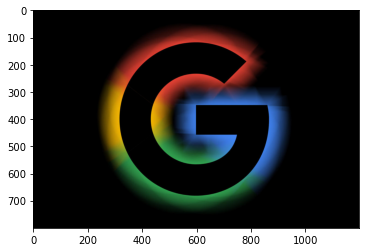

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import misc
import imageio
#f = misc.face()
f=mpimg.imread(r'D:\My Goals 2021\1. DeepBytes\1A. Python\8. Module\6.Scipy\gmage.jpg') # uses the Image module (PIL)

 
plt.imshow(f)
plt.show()

See also

• Load text files:

https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html#numpy.loadtxt

• Clever loading of text/csv files:

https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt
    
• Fast and efficient, but numpy-specific, binary format:  

https://numpy.org/doc/stable/reference/generated/numpy.save.html#numpy.save

    
• More advanced input/output of images in scikit-image:  

https://scikit-image.org/docs/stable/api/skimage.io.html#module-skimage.io

Special functions: scipy.special
    
Special functions are transcendental functions. The docstring of the scipy.special module is wellwritten, so we won’t list all functions here. Frequently used ones are:
    
• Bessel function, such as scipy.special.jn() (nth integer order Bessel function)

• Elliptic function (scipy.special.ellipj() for the Jacobian elliptic function, . . . )

• Gamma function: scipy.special.gamma(), also note scipy.special.gammaln() which will give
the log of Gamma to a higher numerical precision.

• Erf, the area under a Gaussian curve: scipy.special.erf()

Linear algebra operations: scipy.linalg

In [24]:
from scipy import linalg
arr = np.array([[1, 2], [3, 4]])
linalg.det(arr)

-2.0

In [26]:
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [27]:
np.allclose(np.dot(arr, iarr), np.eye(2))

True

In [28]:
arr = np.array([[3, 2], [6, 4]])
linalg.inv(arr)

LinAlgError: singular matrix

In [29]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

In [30]:
spec

array([14.88982544,  0.45294236,  0.29654967])

In [31]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

True

Interpolation: scipy.interpolate

By imagining experimental data close to a sine function:

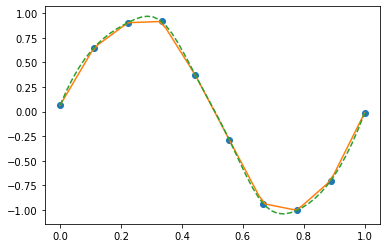

In [34]:
t1 = np.linspace(0, 1, 10) #measured time 
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise
from scipy.interpolate import interp1d
f = interp1d(measured_time, measures)
f2 = interp1d(measured_time, measures, kind='cubic') #cubic interploration 
import matplotlib.pyplot as plt
t2 = np.linspace(0, 1, 50) #interporated time 
plt.plot(t1 ,measures, 'o', t2, f(t2), '-', t2, f2(t2), '--')

 Optimization and fit: scipy.optimize
 
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

In [12]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

Define the data to be fit with some noise:

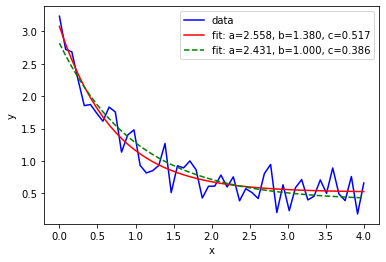

In [22]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

 Finding the minimum of a scalar function
 
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

In [23]:
def f(x):
        return x**2 + 10*np.sin(x)

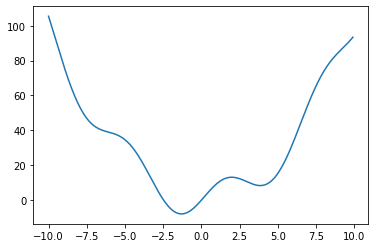

In [24]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show()

This function has a global minimum around -1.3 and a local minimum around 3.8.

Searching for minimum can be done with scipy.optimize.minimize(), given a starting point x0, it
returns the location of the minimum that it has found:

In [26]:
result = optimize.minimize(f, x0=0)
result

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

As the function is a smooth function, gradient-descent based methods are good options. The
lBFGS algorithm is a good choice in general:



In [27]:
optimize.minimize(f, x0=0, method="L-BFGS-B")

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.68753901e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644017])

Global minimum: A possible issue with this approach is that, if the function has local minima, the
algorithm may find these local minima instead of the global minimum depending on the initial point x0:

In [28]:
res = optimize.minimize(f, x0=3, method="L-BFGS-B")
res.x

array([3.83746709])

If we don’t know the neighborhood of the global minimum to choose the initial point, we need to resort
to costlier global optimization. To find the global minimum, we use scipy.optimize.basinhopping()
(added in version 0.12.0 of Scipy). It combines a local optimizer with sampling of starting points:

In [29]:
optimize.basinhopping(f, 0)

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[0.08578148]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1012
                        nit: 100
                       njev: 506
                          x: array([-1.30644001])

Constraints: We can constrain the variable to the interval (0, 10) using the “bounds” argument:

In [30]:
res = optimize.minimize(f, x0=1,
                        bounds=((0, 10), ))
res.x

array([0.])

Finding the roots of a scalar function

In [31]:
root = optimize.root(f, x0=1) # our initial guess is 1
root

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.33310463e-32])
       r: array([-10.])
  status: 1
 success: True
       x: array([0.])

In [32]:
 root.x # Only the root found

array([0.])

In [34]:
root2 = optimize.root(f, x0=-2.5)
root2.x

array([-2.47948183])

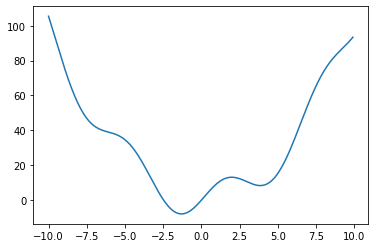

In [82]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**2 + 10*np.sin(x)
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))

In [83]:
from scipy import optimize #Optimization
# The default (Nelder Mead)
print(optimize.minimize(f, x0=0))

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])


In [84]:
plt.show()

Statistics and random numbers: scipy.stats

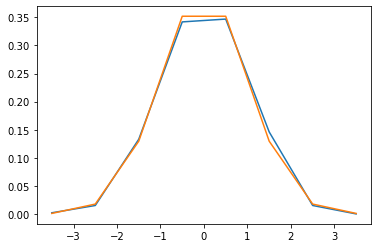

In [36]:
samples = np.random.normal(size=1000)
bins = np.arange(-4, 5)
histogram = np.histogram(samples, bins=bins, density=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
from scipy import stats
pdf = stats.norm.pdf(bins) # norm is a distribution object
plt.plot(bins, histogram)
#[<matplotlib.lines.Line2D object at ...>]
plt.plot(bins, pdf)
#[<matplotlib.lines.Line2D object at ...>]

The distribution objects
scipy.stats.norm is a distribution object: each distribution in scipy.stats is represented as an
object. Here it’s the normal distribution, and it comes with a PDF, a CDF, and much more.

In [38]:
 loc, std = stats.norm.fit(samples)
loc

0.015227056171713268

In [39]:
std

0.9708689806062326

Mean, median and percentiles

In [41]:
np.mean(samples)

0.015227056171713268

In [42]:
np.median(samples)

0.03417083519460297

In [43]:
stats.scoreatpercentile(samples, 50)

0.03417083519460297

In [44]:
stats.scoreatpercentile(samples, 90)

1.301984523813679

Statistical tests

A statistical test is a decision indicator. For
instance, if we have two sets of observations, that we assume are generated from Gaussian processes, we
can use a T-test to decide whether the means of two sets of observations are significantly different:


In [46]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-2.6146152340281645, pvalue=0.010208703949437794)

Tip: The resulting output is composed of:
        
• The T statistic value: it is a number the sign of which is proportional to the difference between
the two random processes and the magnitude is related to the significance of this difference.

• the p value: the probability of both processes being identical. If it is close to 1, the two process
are almost certainly identical. The closer it is to zero, the more likely it is that the processes have
different means.

Numerical integration: scipy.integrate
    
The most generic integration routine is scipy.integrate.quad(). To compute ∫︀0𝜋/2 𝑠𝑖𝑛(𝑡)𝑑𝑡

In [49]:
from scipy.integrate import quad
res, err = quad(np.sin, 0, np.pi/2)
np.allclose(res, 1) # res is the result, is should be close to 1
np.allclose(err, 1 - res) # err is an estimate of the err

True

Other integration schemes are available: scipy.integrate.fixed_quad(), scipy.integrate.
quadrature(), scipy.integrate.romberg(). . .

Integrating differential equations

scipy.integrate also features routines for integrating Ordinary Differential Equations (ODE). In particular, scipy.integrate.odeint() solves ODE of the form

dy/dt = rhs(y1, y2, .., t0,...)

As an introduction, let us solve the ODE 𝑑𝑦/ 𝑑𝑡 = −2𝑦 between 𝑡 = 0 . . . 4, with the initial condition
𝑦(𝑡 = 0) = 1. First the function computing the derivative of the position needs to be defined:

In [50]:
def calc_derivative(ypos, time):
    return -2 * ypos

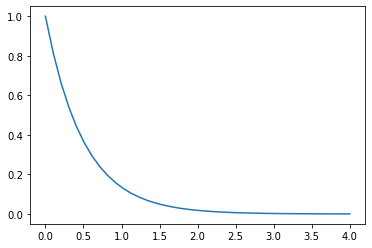

In [51]:
 from scipy.integrate import odeint
time_vec = np.linspace(0, 4, 40)
y = odeint(calc_derivative, y0=1, t=time_vec)
plt.plot(time_vec,y)

Let us integrate a more complex ODE: a damped spring-mass oscillator. The position of a mass attached
to a spring obeys the 2nd order ODE 𝑦′′ + 2𝜀𝜔0𝑦′ + 𝜔02𝑦 = 0 with 𝜔02 = 𝑘/𝑚 with 𝑘 the spring constant,
𝑚 the mass and 𝜀 = 𝑐/(2𝑚𝜔0) with 𝑐 the damping coefficient. We set:

In [52]:
mass = 0.5 # kg
kspring = 4 # N/m
cviscous = 0.4 # N s/m
eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)
eps<1

True

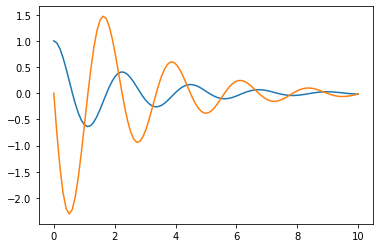

In [53]:
def calc_deri(yvec, time, eps, omega):
    return (yvec[1], -2.0 * eps * omega * yvec[1] - omega **2 * yvec[0])

time_vec = np.linspace(0, 10, 100)
yinit = (1, 0)
yarr = odeint(calc_deri, yinit, time_vec, args=(eps, omega))
plt.plot(time_vec,yarr)

Partial Differental Equations
There is no Partial Differential Equations (PDE) solver in Scipy. Some Python packages for solving
PDE’s are available, such as fipy or SfePy.

Fast Fourier transforms: scipy.fftpack
    
The scipyfftpack module computes fast Fourier transforms (FFTs) and offers utilities to handle them.
The main functions are:
    
• scipy.fftpack.fft() to compute the FFT

• scipy.fftpack.fftfreq() to generate the sampling frequencies

• scipy.fftpack.ifft() computes the inverse FFT, from frequency space to signal space

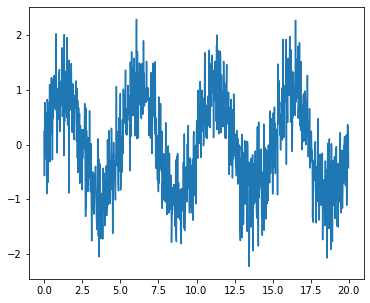

In [58]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt
# Seed the random number generator
np.random.seed(1234)
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
+ 0.5 * np.random.randn(time_vec.size))
plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

Compute and plot the power

[]

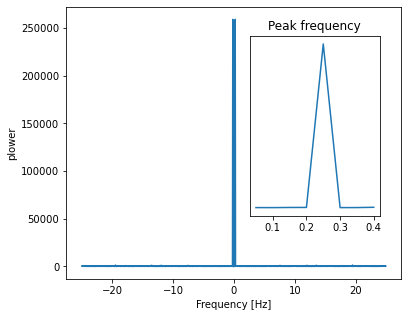

In [61]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)
# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2
# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)
# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])
# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

Remove all the high frequencies

We now remove all the high frequencies and transform back from frequencies to signal

D:\Anacond1\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


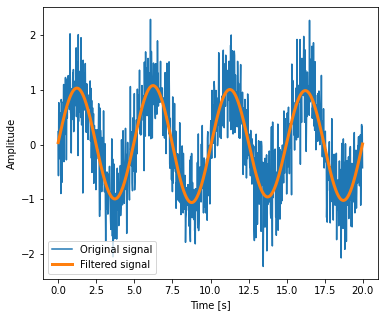

In [62]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)
plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')

Crude periodicity finding
Discover the periods in evolution of animal populations (../../../../data/populations.txt)

In [64]:
import numpy as np
data = np.loadtxt('../../../../data/populations.txt')
years = data[:, 0]
populations = data[:, 1:]
mport matplotlib.pyplot as plt
plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)')
plt.legend(['hare', 'lynx', 'carrot'], loc=1)

SyntaxError: invalid syntax (<ipython-input-64-7502a822d74b>, line 5)

Signal processing: scipy.signal

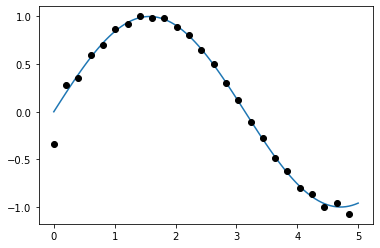

In [65]:
t = np.linspace(0, 5, 100)
x = np.sin(t)
from scipy import signal
x_resampled = signal.resample(x, 25)
plt.plot(t, x)
#[<matplotlib.lines.Line2D object at ...>]
plt.plot(t[::4], x_resampled, 'ko')
#[<matplotlib.lines.Line2D object at ...>]

Filtering: For non-linear filtering, scipy.signal has filtering (median filter scipy.signal.medfilt(),
Wiener scipy.signal.wiener()), but we will discuss this in the image section.

Spectral analysis: scipy.signal.spectrogram() compute a spectrogram –frequency spectrums over
consecutive time windows–, while scipy.signal.welch() comptes a power spectrum density (PSD).

 Image manipulation: scipy.ndimage
 
 Geometrical transformations on images

In [66]:
from scipy import misc # Load an image
face = misc.face(gray=True)
from scipy import ndimage # Shift, roate and zoom it
shifted_face = ndimage.shift(face, (50, 50))
shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')
rotated_face = ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = ndimage.zoom(face, 2)
zoomed_face.shape

(1536, 2048)

(-0.5, 1023.5, 767.5, -0.5)

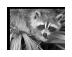

In [71]:
plt.subplot(151)
plt.imshow(shifted_face, cmap=plt.cm.gray)
plt.axis('off')

  Image filtering

In [72]:
from scipy import misc
face = misc.face(gray=True)
face = face[:512, -512:] # crop out square on right
import numpy as np
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)

Apply a variety of filters on it:

(-0.5, 511.5, 511.5, -0.5)

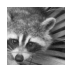

In [74]:
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)
plt.subplot(151)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')


(-0.5, 511.5, 511.5, -0.5)

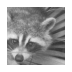

In [75]:
from scipy import signal
wiener_face = signal.wiener(noisy_face, (5, 5))
plt.subplot(151)
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.axis('off')

Mathematical morphology

Mathematical morphology stems from set theory. It characterizes and transforms geometrical
structures. Binary (black and white) images, in particular, can be transformed using this theory: the
sets to be transformed are the sets of neighboring non-zero-valued pixels. The theory was also extended
to gray-valued images

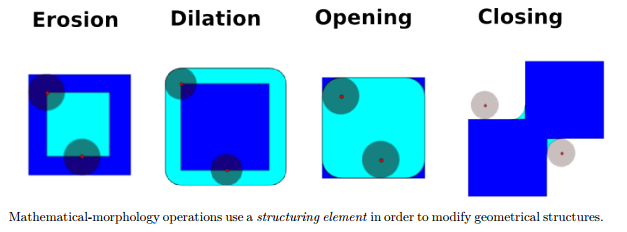

Mathematical-morphology operations use a structuring element in order to modify geometrical structures.

Let us first generate a structuring element:

In [76]:
el = ndimage.generate_binary_structure(2, 1)
el

array([[False,  True, False],
       [ True,  True,  True],
       [False,  True, False]])

In [77]:
el.astype(np.int)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

In [79]:
a = np.zeros((7, 7), dtype=np.int)
a[1:6, 2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [80]:
 ndimage.binary_erosion(a).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [81]:
ndimage.binary_erosion(a, structure=np.ones((5,5))).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

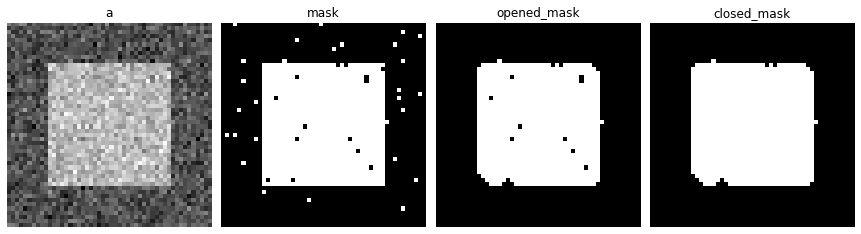

In [85]:
# Generate some binary data
import numpy as np
np.random.seed(0)
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25 * np.random.standard_normal(a.shape)
mask = a>=0.5
# Apply mathematical morphology
from scipy import ndimage
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)
# Plot
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(a, cmap=plt.cm.gray)
plt.axis('off')
plt.title('a')
plt.subplot(142)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('mask')
plt.subplot(143)
plt.imshow(opened_mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('opened_mask')
plt.subplot(144)
plt.imshow(closed_mask, cmap=plt.cm.gray)
plt.title('closed_mask')
plt.axis('off')
plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)
plt.show()

Demo connected components

Extracting and labeling connected components in a 2D array

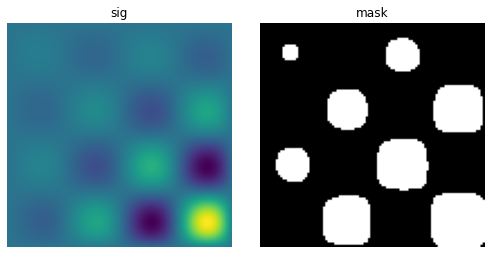

In [86]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(0)
x, y = np.indices((100, 100))
sig = np.sin(2*np.pi*x/50.) * np.sin(2*np.pi*y/50.) * (1+x*y/50.**2)**2
mask = sig > 1
plt.figure(figsize=(7, 3.5))
plt.subplot(1, 2, 1)
plt.imshow(sig)
plt.axis('off')
plt.title('sig')
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('mask')
plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.9)

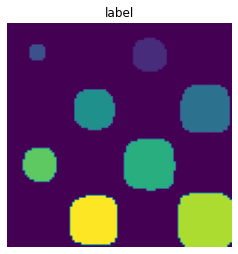

In [87]:
from scipy import ndimage
labels, nb = ndimage.label(mask)
plt.figure(figsize=(3.5, 3.5))
plt.imshow(labels)
plt.title('label')
plt.axis('off')
plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.9)

Extract the 4th connected component, and crop the array around it

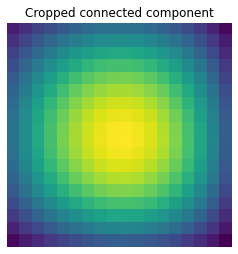

In [88]:
sl = ndimage.find_objects(labels==4)
plt.figure(figsize=(3.5, 3.5))
plt.imshow(sig[sl[0]])
plt.title('Cropped connected component')
plt.axis('off')
plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.9)
plt.show()

Minima and roots of a function

Demos finding minima and roots of a function.

Define the function

In [89]:
import numpy as np
x = np.arange(-10, 10, 0.1)
def f(x):
    return x**2 + 10*np.sin(x)

Find minima

In [91]:
from scipy import optimize
# Global optimization
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid, ))
print("Global minima found %s " % xmin_global)
# Constrain optimization
xmin_local = optimize.fminbound(f, 0, 10)
print("Local minimum found %s " % xmin_local)

Global minima found [-1.30641113] 
Local minimum found 3.8374671194983834 


Root finding

In [92]:
root = optimize.root(f, 1) # our initial guess is 1
print("First root found %s " % root.x)
root2 = optimize.root(f, -2.5)
print("Second root found %s " % root2.x)

First root found [0.] 
Second root found [-2.47948183] 


Plot function, minima, and roots

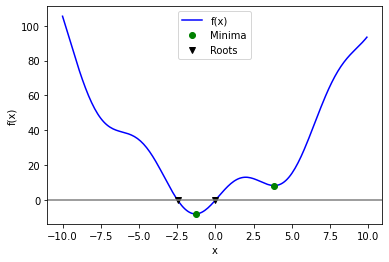

In [93]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
# Plot the function
ax.plot(x, f(x), 'b-', label="f(x)")
# Plot the minima
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")
# Plot the roots
roots = np.array([root.x, root2.x])
ax.plot(roots, f(roots), 'kv', label="Roots")
# Decorate the figure
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.axhline(0, color='gray')
plt.show()

Plot filtering on images

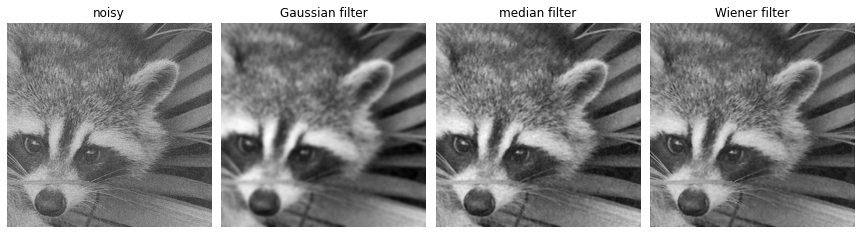

In [94]:
# Load some data
from scipy import misc
face = misc.face(gray=True)
face = face[:512, -512:] # crop out square on right
# Apply a variety of filters
from scipy import ndimage
from scipy import signal
from matplotlib import pyplot as plt
import numpy as np
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)
wiener_face = signal.wiener(noisy_face, (5, 5))
plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('noisy')
plt.subplot(142)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gaussian filter')
plt.subplot(143)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('median filter')
plt.subplot(144)
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.title('Wiener filter')
plt.axis('off')
plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)
plt.show()

Optimization of a two-parameter function

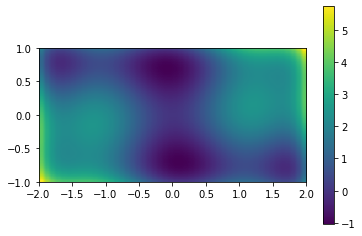

In [97]:
import numpy as np
# Define the function that we are interested in
def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)
# Make a grid to evaluate the function (for plotting)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)
#A 2D image plot of the function
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()

A 3D surface plot of the function

Text(0.5, 0.92, 'Six-hump Camelback function')

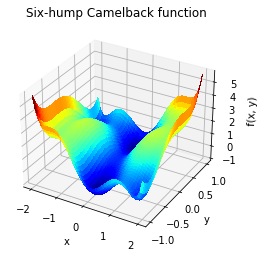

In [98]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
cmap=plt.cm.jet, linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

Find the minima

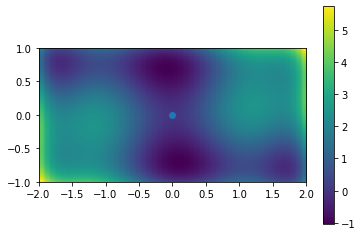

In [99]:
from scipy import optimize
x_min = optimize.minimize(sixhump, x0=[0, 0])
plt.figure()
# Show the function in 2D
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()
# And the minimum that we've found:
plt.scatter(x_min.x[0], x_min.x[1])
plt.show()

Plotting and manipulating FFTs for filtering

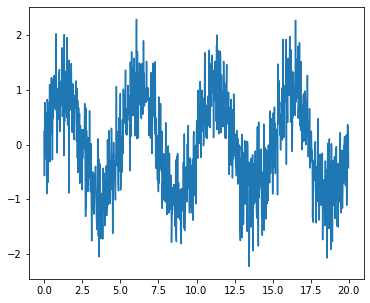

In [100]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt
# Seed the random number generator
np.random.seed(1234)
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
+ 0.5 * np.random.randn(time_vec.size))
plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

Compute and plot the power

[]

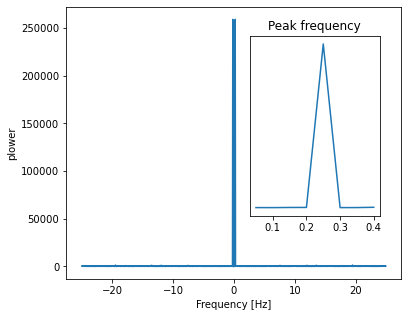

In [102]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)
# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2
# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)
# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])
# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detectio

Remove all the high frequencies

We now remove all the high frequencies and transform back from frequencies to sig

D:\Anacond1\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


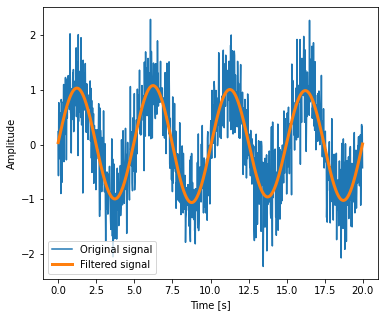

In [103]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)
plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')